In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
df.drop(["day","month","year"],axis=1,inplace = True)

In [38]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [39]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
# independent and dependent features 
x = df.drop('FWI',axis=1)
y = df['FWI']

In [41]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [42]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [45]:
corr = df.corr()

<Axes: >

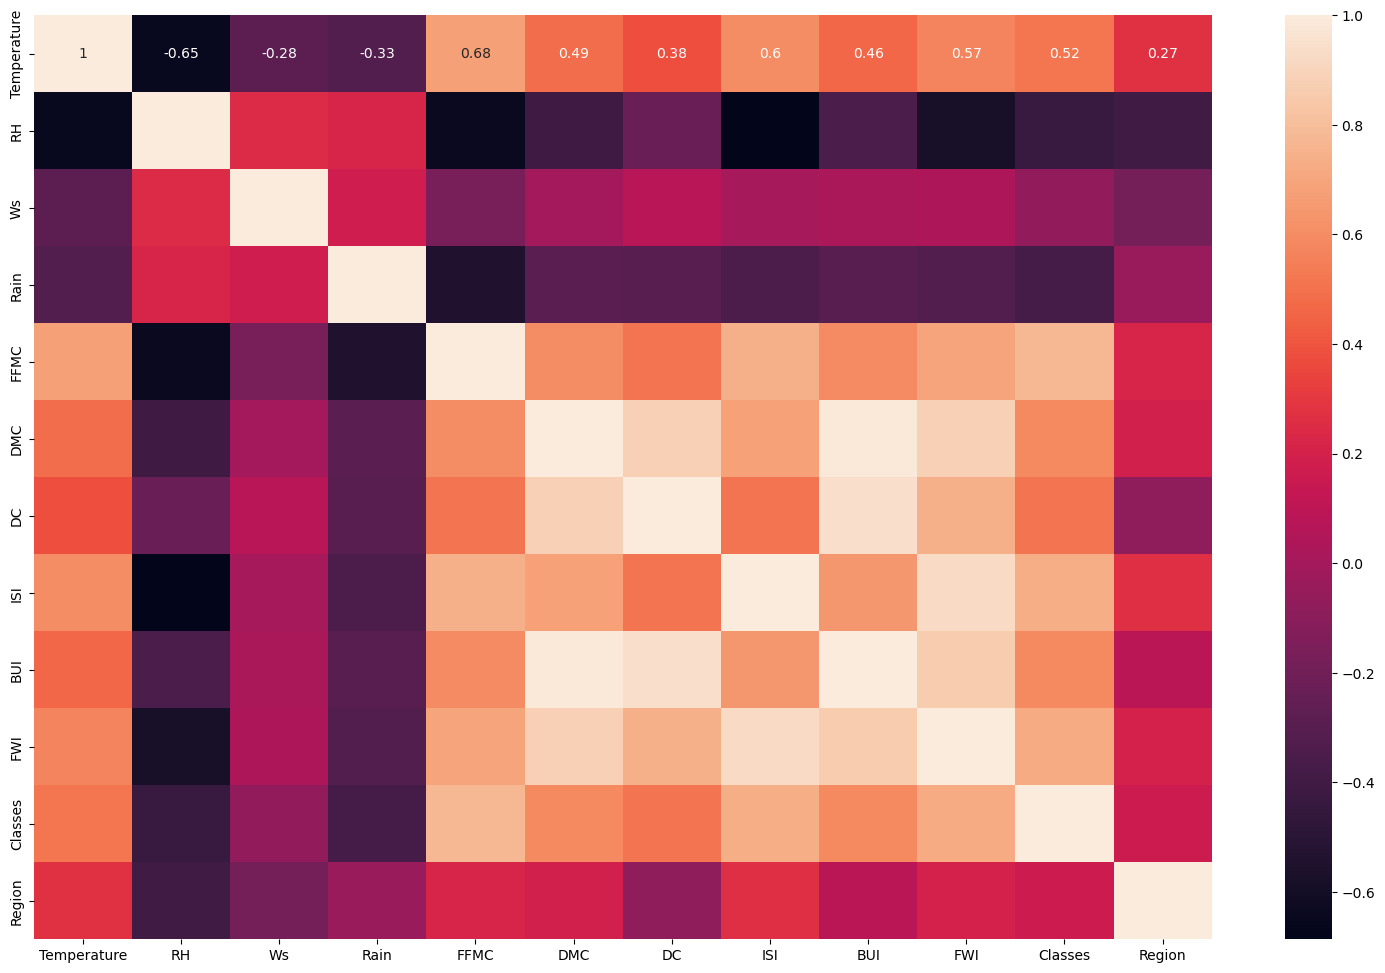

In [46]:
plt.figure(figsize=(19,12))
sns.heatmap(corr,annot=True)

In [47]:
corr_matrix = df.corr()
abs(corr_matrix.iloc[1,3])

0.22235607658772708

In [48]:
def correlation(dataset,threshold) :
    corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range(i) :
            if abs(corr_matrix.iloc[i,j]) > threshold :
                colname = corr_matrix.columns[i]
                corr.add(colname)
    return corr

In [49]:
corr_col = correlation(x_train,0.85)

In [50]:
# drop the features when correlation is more than 0.85
x_train.drop(corr_col,axis=1,inplace=True)
x_test.drop(corr_col,axis=1,inplace=True)

### Standardization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

Text(0.5, 1.0, 'after standardiation')

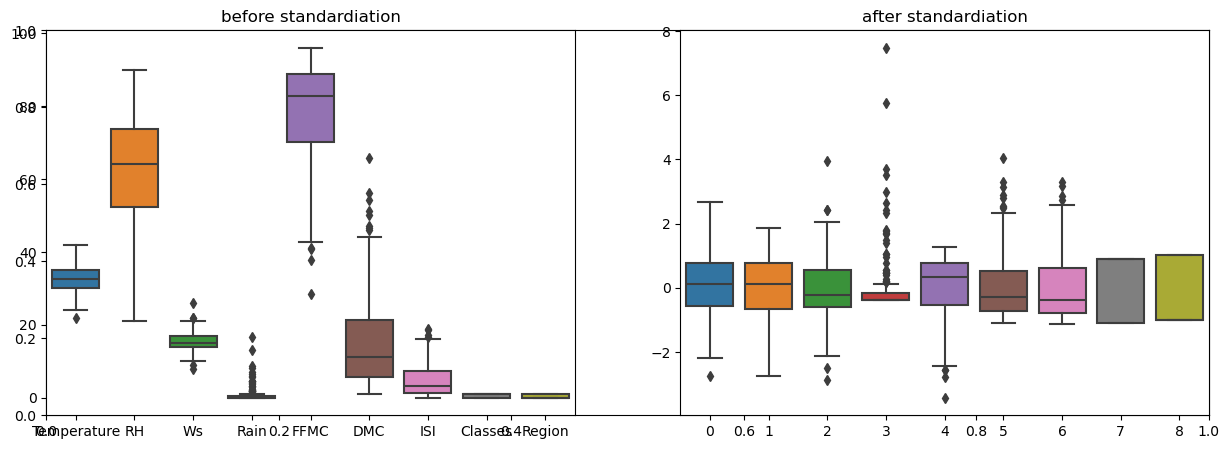

In [52]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("before standardiation")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scale)
plt.title("after standardiation")

### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train_scale,y_train)
y_pred = linreg.predict(x_train_scale)
mae = mean_absolute_error(y_train,y_pred)
r_score = r2_score(y_train,y_pred)
print("mean absolute error",mae)
print("r2_score",r_score)

mean absolute error 0.7438000223762666
r2_score 0.969907766275777


##### based on graph - plt.scatter(y_test,y_pred)

## Lasso regression

mean absolute error 1.1331759949144085
r2_score 0.9492020263112388


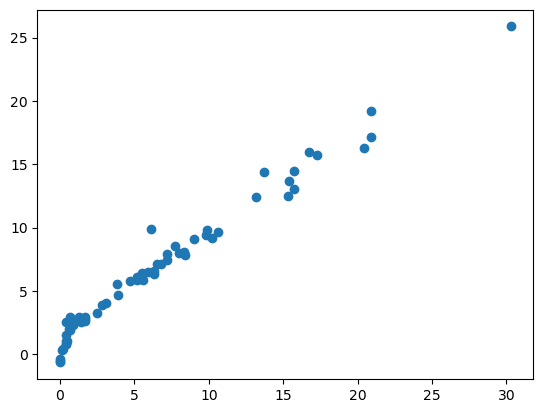

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scale,y_train)
y_pred = lasso.predict(x_test_scale)
mae = mean_absolute_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2_score",r_score)
plt.scatter(y_test,y_pred)

## Ridge regression

mean absolute error 0.5642305340105693
r2_score 0.9842993364555513


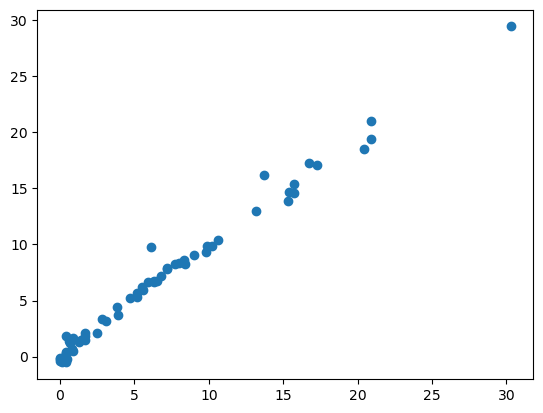

In [55]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scale,y_train)
y_pred = ridge.predict(x_test_scale)
mae = mean_absolute_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2_score",r_score)
plt.scatter(y_test,y_pred)

## ElasticNet

mean absolute error 1.8822353634896
r2_score 0.8753460589519703


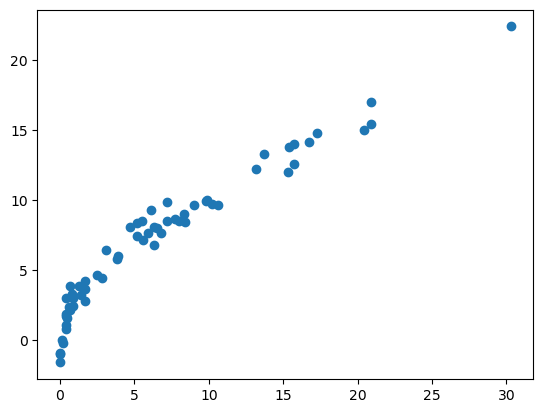

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(x_train_scale,y_train)
y_pred = elastic.predict(x_test_scale)
mae = mean_absolute_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2_score",r_score)
plt.scatter(y_test,y_pred)

### Lasso cross validation

In [57]:
from sklearn.linear_model import LassoCV

In [58]:
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scale,y_train)

LassoCV(cv=5)

In [59]:
lassocv.alpha_

0.05725391318234405

In [60]:
lassocv.alphas_

array([7.05853002e+00, 6.58280872e+00, 6.13914944e+00, 5.72539132e+00,
       5.33951911e+00, 4.97965339e+00, 4.64404142e+00, 4.33104857e+00,
       4.03915039e+00, 3.76692517e+00, 3.51304702e+00, 3.27627941e+00,
       3.05546914e+00, 2.84954075e+00, 2.65749124e+00, 2.47838523e+00,
       2.31135036e+00, 2.15557308e+00, 2.01029467e+00, 1.87480753e+00,
       1.74845178e+00, 1.63061198e+00, 1.52071419e+00, 1.41822315e+00,
       1.32263965e+00, 1.23349817e+00, 1.15036452e+00, 1.07283380e+00,
       1.00052839e+00, 9.33096128e-01, 8.70208572e-01, 8.11559427e-01,
       7.56863037e-01, 7.05853002e-01, 6.58280872e-01, 6.13914944e-01,
       5.72539132e-01, 5.33951911e-01, 4.97965339e-01, 4.64404142e-01,
       4.33104857e-01, 4.03915039e-01, 3.76692517e-01, 3.51304702e-01,
       3.27627941e-01, 3.05546914e-01, 2.84954075e-01, 2.65749124e-01,
       2.47838523e-01, 2.31135036e-01, 2.15557308e-01, 2.01029467e-01,
       1.87480753e-01, 1.74845178e-01, 1.63061198e-01, 1.52071419e-01,
      

In [61]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mean absolute error 0.6199701158263433
r2_score 0.9820946715928275


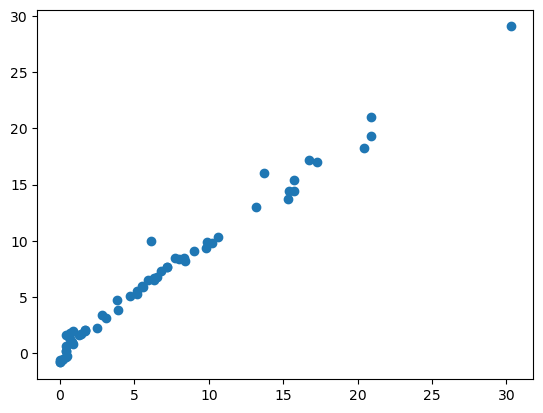

In [62]:
y_pred = lassocv.predict(x_test_scale)
mae = mean_absolute_error(y_test,y_pred)
r_score = r2_score(y_test,y_pred)
print("mean absolute error",mae)
print("r2_score",r_score)
plt.scatter(y_test,y_pred)

## Pickling

In [63]:
# pickle the machine learning model,preprocessing model standardscaler

In [64]:
scaler

StandardScaler()

In [65]:
# Iam taking ridge regression because it gives high accuracy
ridge

Ridge()

In [66]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge,open("ridge.pkl","wb"))